# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

### 데이터 가져오기

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [3]:
mini_data = pd.read_table('data/mini.csv',sep=',')

In [4]:
mini_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


### 데이터 살펴보기

In [8]:
mini_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [9]:
mini_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [32]:
# 다음달에 구독을 취소할 수강생(0)과 구독을 연장할 수강생(1)
# 난이도
group = mini_data.groupby('preferred_difficulty_level')['target'].value_counts().sort_index()
group

preferred_difficulty_level  target
High                        0          759
                            1         1241
Low                         0         1945
                            1         3047
Medium                      0         1097
                            1         1911
Name: count, dtype: int64

In [ ]:
# 다음달에 구독을 취소할 수강생(0)과 구독을 연장할 수강생(1)
group = mini_data.groupby('target')['user_id'].count()
group

In [36]:
# 다음달에 구독을 취소할 수강생(0)과 구독을 연장할 수강생(1)
# 문의수
group = mini_data.groupby('target')['customer_inquiry_history'].sum().sort_index()
group
# mini_data['customer_inquiry_history'].value_counts().sort_index() : 전체 문의 수

target
0     7640
1    12465
Name: customer_inquiry_history, dtype: int64

In [52]:
# 다음달에 구독을 취소할 수강생(0)과 구독을 연장할 수강생(1)
# 최근 학습 성취도
group = mini_data.groupby('target')['recent_learning_achievement'].describe()
group

target
0    74.981448
1    75.199591
Name: recent_learning_achievement, dtype: float64

In [68]:
# 다음달에 구독을 취소할 수강생(0)과 구독을 연장할 수강생(1)
# 구독 유형
group = mini_data.groupby('subscription_type')['target'].describe()
group

,count,mean,std,min,25%,50%,75%,max
subscription_type,,,,,,,,
Basic,5979.0,0.615989,0.486401,0.0,0.0,1.0,1.0,1.0
Premium,4021.0,0.625715,0.483998,0.0,0.0,1.0,1.0,1.0


In [57]:
# 다음달에 구독을 취소할 수강생(0)과 구독을 연장할 수강생(1)
# 중단된 학습 세션 수
group = mini_data.groupby('target')['abandoned_learning_sessions'].describe()
group

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,3801.0,3.087609,1.755430,0.0,2.0,3.0,4.0,11.0
1,6199.0,3.016616,1.754416,0.0,2.0,3.0,4.0,12.0


### 분석

In [20]:
#구독을 유지할 수강생 수
maintain = mini_data['target'].value_counts()[1]
drop = mini_data['target'].value_counts()[0]

print(f'구독: {maintain}명')
print(f'취소: {drop}명')

구독: 6199명
취소: 3801명


In [13]:
# 다음달에 구독을 취소할 수강생(0)과 구독을 연장할 수강생(1)
# 월간 활동적인 학습 일수
group = mini_data.groupby('target')['monthly_active_learning_days'].value_counts().sort_index()
group

target  monthly_active_learning_days
0       1                               132
        2                               154
        3                               158
        4                               177
        5                               167
        6                               158
        7                               162
        8                               168
        9                               162
        10                              170
        11                              126
        12                              151
        13                              161
        14                              157
        15                              166
        16                              160
        17                              162
        18                              179
        19                              160
        20                              165
        21                              159
        22                             

<BarContainer object of 24 artists>

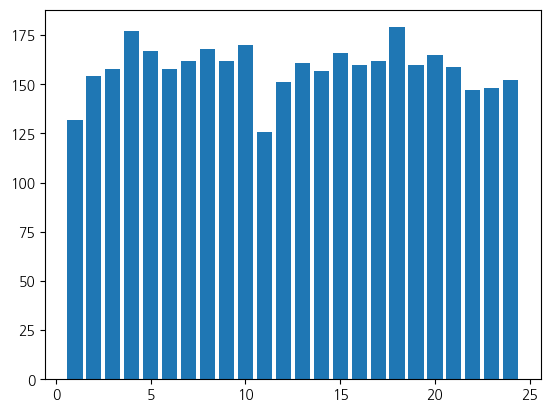

In [24]:
#취소
plt.bar(group[0].index, group[0].values)

<BarContainer object of 24 artists>

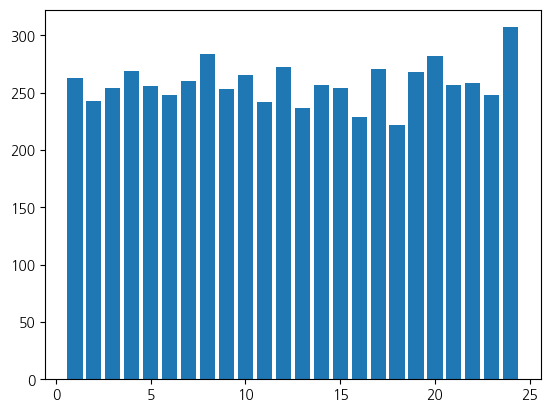

In [26]:
#구록
plt.bar(group[1].index, group[1].values)